# Projeto Técnicas de Programação I
| Autor: | Hugo Silva de Vasconcelos|
| --- | --- |
| Data: | 02/08/2023 |
|Dataset: | [DATASET COVID (Fornecido)]() |

In [3]:
import pandas as pd
import numpy as np

In [4]:
deaths = pd.read_csv('./COVID_DEATHS.csv')
# deaths = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BeTech Braskem/Técnicas de Programação I/dados/COVID DEATHS.csv')
vacinacao = pd.read_csv('./COVID_VACCINATIONS.csv')
# vacinacao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BeTech Braskem/Técnicas de Programação I/dados/COVID_VACCINATIONS.csv')

In [5]:
deaths.head()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,1/3/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
vacinacao.head()

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,1/3/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN


In [7]:
vacinacao.keys()

Index(['iso_code', 'continent', 'location', 'date', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
  

In [8]:
deaths['date'] = pd.to_datetime(deaths['date'], format='%m/%d/%Y')

In [9]:
vacinacao['date'] = pd.to_datetime(vacinacao['date'], format='%m/%d/%Y')

In [10]:
print("Shape Dataframe Mortes: ", deaths.shape, "\n")
print("Shape Dataframe Vacinados: ", vacinacao.shape)

Shape Dataframe Mortes:  (302749, 26) 

Shape Dataframe Vacinados:  (302749, 45)


In [11]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302749 entries, 0 to 302748
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   iso_code                            302749 non-null  object        
 1   continent                           288347 non-null  object        
 2   location                            302749 non-null  object        
 3   date                                302749 non-null  datetime64[ns]
 4   population                          302749 non-null  int64         
 5   total_cases                         266771 non-null  float64       
 6   new_cases                           294064 non-null  float64       
 7   new_cases_smoothed                  292800 non-null  float64       
 8   total_deaths                        246214 non-null  float64       
 9   new_deaths                          294139 non-null  float64       
 10  new_deat

## Análise 1:

A quantidade de pessoas hospitalizadas diminuiu quando o total de vacinação aumentou?

In [12]:
deaths['hosp_patients'].isna().sum()

267507

In [13]:
vacinacao['total_vaccinations'].isna().sum()

229002

Nota-se que a quantidade de dados úteis em ambas as colunas é significativa, podendo trazer informações relevantes para a análise.

Nas células abaixo, utiliza-se a técnica de backfill, onde a função fillna busca o próximo valor válido e preenche os nulos com este. Os demais casos, não alcançados pelo método, são preenchidos com 0.

In [14]:
deaths['hosp_patients'].fillna(method='bfill', inplace=True)
deaths['hosp_patients'].fillna(0, inplace=True)

In [15]:
vacinacao['total_vaccinations'].fillna(method='bfill', inplace=True)
vacinacao['total_vaccinations'].fillna(0, inplace=True)

Na célula abaixo, utiliza-se o groupby, juntamente com a função de soma, para agrupar os valores do dataset pela data do registro somando cada valor. Dessa forma, podemos ter uma noção do total de hospitalizados e vacinados no mundo todo.

In [16]:
vacinacao_grouped = vacinacao.groupby(by=['date'], dropna=True).sum().reset_index()
deaths_grouped = deaths.groupby(by=['date'], dropna=True).sum().reset_index()

C:\Users\hugos\AppData\Local\Temp\ipykernel_15224\4229934122.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vacinacao_grouped = vacinacao.groupby(by=['date'], dropna=True).sum().reset_index()
C:\Users\hugos\AppData\Local\Temp\ipykernel_15224\4229934122.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deaths_grouped = deaths.groupby(by=['date'], dropna=True).sum().reset_index()


In [17]:
print(vacinacao_grouped.shape)
print(deaths_grouped.shape)

(1204, 41)
(1204, 23)


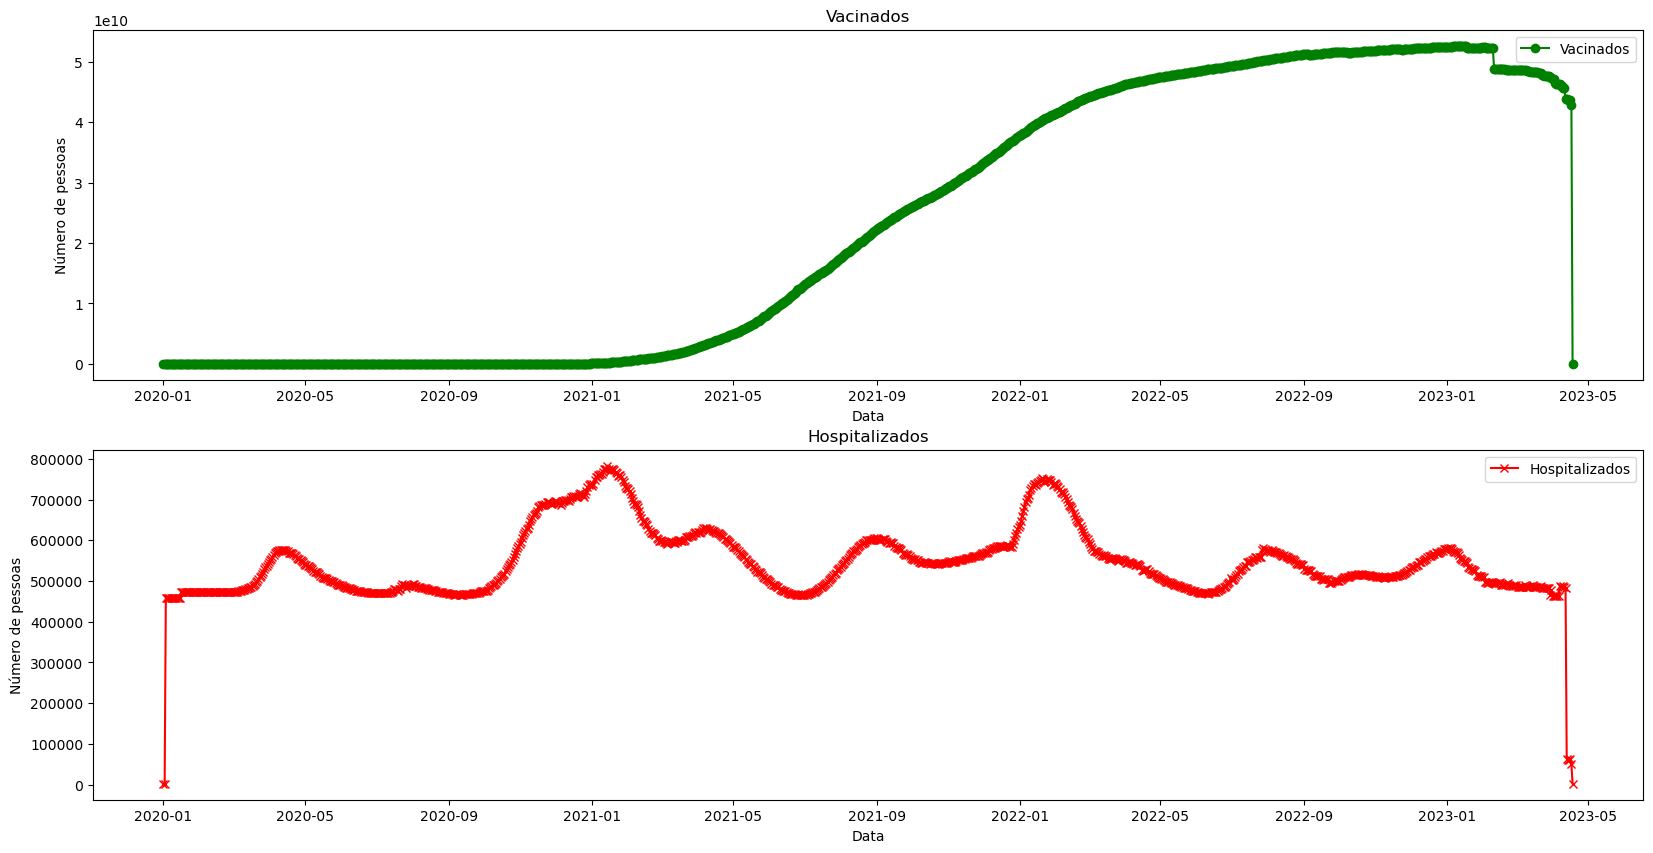

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(vacinacao_grouped['date'], vacinacao_grouped['total_vaccinations'], label='Vacinados', color='green', marker='o', linestyle='solid')
plt.xlabel('Data')
plt.ylabel('Número de pessoas')
plt.title('Vacinados')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(deaths_grouped['date'], deaths_grouped['hosp_patients'], label='Hospitalizados', color='red', marker='x', linestyle='-')
plt.xlabel('Data')
plt.ylabel('Número de pessoas')
plt.title('Hospitalizados')
plt.legend()
plt.show()
plt.show()


### Conclusões

Observa-se com os gráficos que nos primeiros meses da covid houve um aumento considerável de pessoas hospitalizadas, tendo alguns picos entre o final de 2020 e o início de 2022, e conforme o número de vacinados foi aumentando, observou-se uma estabilização no número de hospitalizados, e posteriormente uma redução deste número de enfermos.

----

## Análise 2:

Qual a relação entre pacientes hospitalizados e quantidade de mortes?

In [19]:
deaths['new_deaths'].isna().sum()

8610

Como a coluna de hospitalizados já foi tratada na análise anterior, basta completar os valores faltantes da coluna de mortes totais.

In [20]:
deaths['new_deaths'].fillna(method='bfill', inplace=True)
deaths['new_deaths'].fillna(0, inplace=True)

Reagrupa-se novamente os dados do dataset de mortes devido à alteração na coluna 'total_deaths'.

In [21]:
deaths_grouped = deaths.groupby(by=['date'], dropna=True).sum().reset_index()

C:\Users\hugos\AppData\Local\Temp\ipykernel_15224\1829931182.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deaths_grouped = deaths.groupby(by=['date'], dropna=True).sum().reset_index()


Text(0, 0.5, 'Número de mortes')

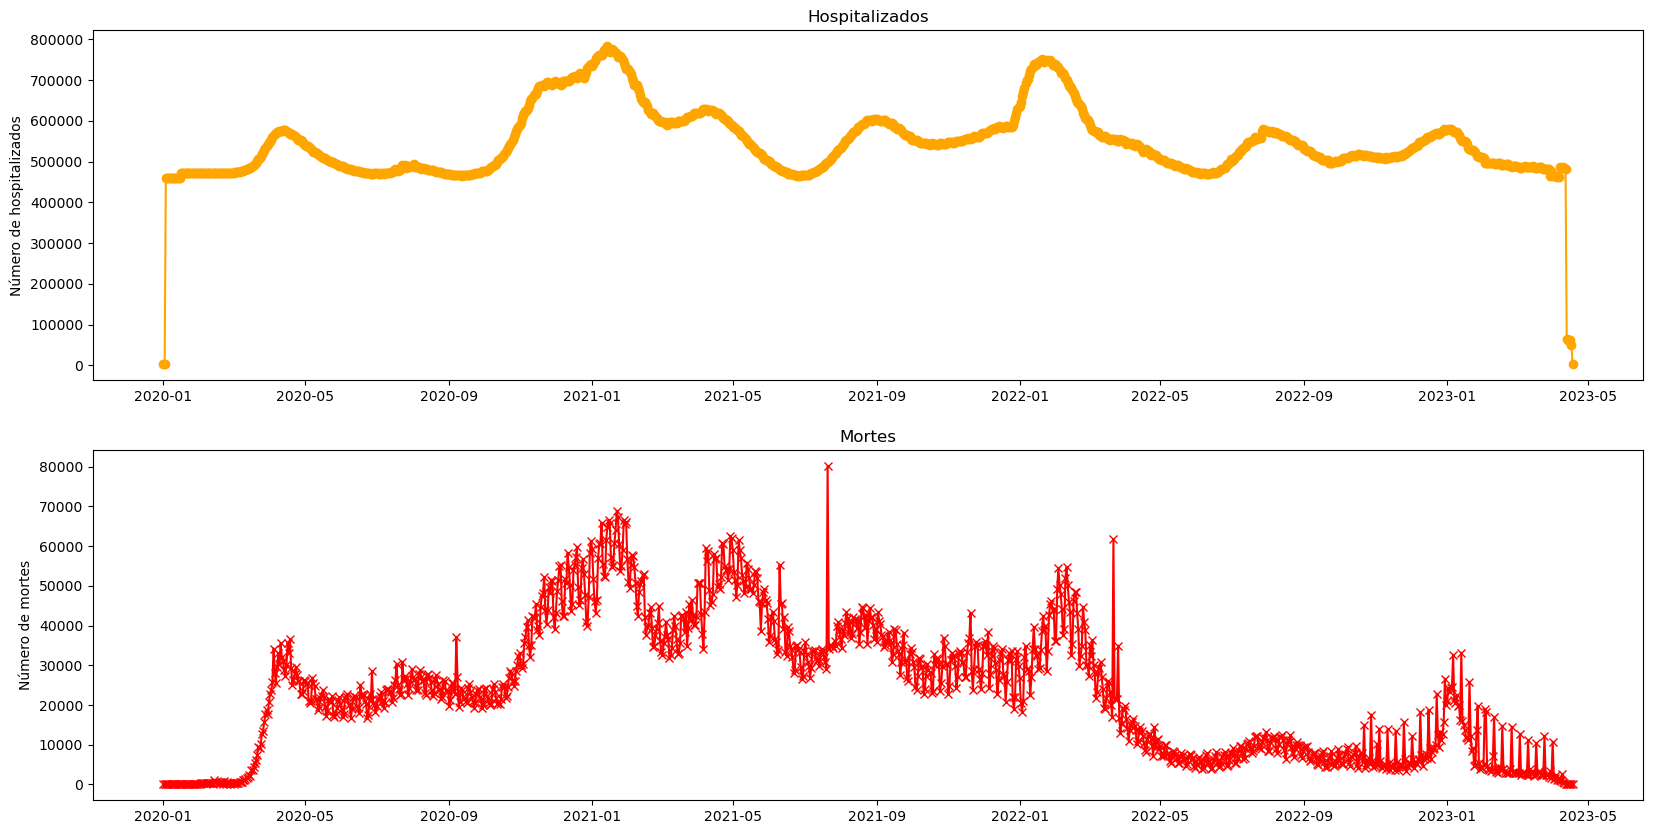

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(deaths_grouped['date'], deaths_grouped['hosp_patients'], color='orange', marker='o')
plt.title('Hospitalizados')
plt.ylabel('Número de hospitalizados')
plt.subplot(2,1,2)
plt.plot(deaths_grouped['date'], deaths_grouped['new_deaths'], color='red', marker='x')
plt.title('Mortes')
plt.ylabel('Número de mortes')

### Conclusões

Observando os gráficos nota-se a forte correlação entre a quantidade de pessoas hospitalizadas e a quantidade de mortes por dia.

---

## Análise 3:

Países com maior índice de rigidez nas medidas restritivas tendem a ter uma taxa de vacinação mais alta?

In [23]:
vacinacao[['date']].max()

date   2023-04-18
dtype: datetime64[ns]

In [24]:
from datetime import datetime
vacinacao[vacinacao['date'] == datetime(2022, 1, 1)][['total_vaccinations_per_hundred']]

,total_vaccinations_per_hundred
729,NaN
1925,21.32
3121,NaN
4317,NaN
5513,NaN
...,...
297492,NaN
298689,115.32
299890,NaN
301086,NaN


In [25]:
country_vaccinated = vacinacao.groupby(by=['continent']).

SyntaxError: invalid syntax (1542150162.py, line 1)

In [ ]:
print('total_vaccinations_per_hundred' in country_vaccinated.keys())
print('people_vaccinated_per_hundred' in country_vaccinated.keys())
print('stringency_index' in country_vaccinated.keys())

True
True
True


In [ ]:
country_vaccinated[['continent','total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'stringency_index']]

,continent,total_vaccinations_per_hundred,people_vaccinated_per_hundred,stringency_index
0,Africa,180826.68,105296.11,2129213.02
1,Asia,2063303.56,860032.07,2338897.41
2,Europe,3034671.00,1258671.27,1885957.38
3,North America,923547.29,411065.67,1039689.60
4,Oceania,251334.78,98098.65,348352.41
5,South America,820998.82,349203.40,645961.16


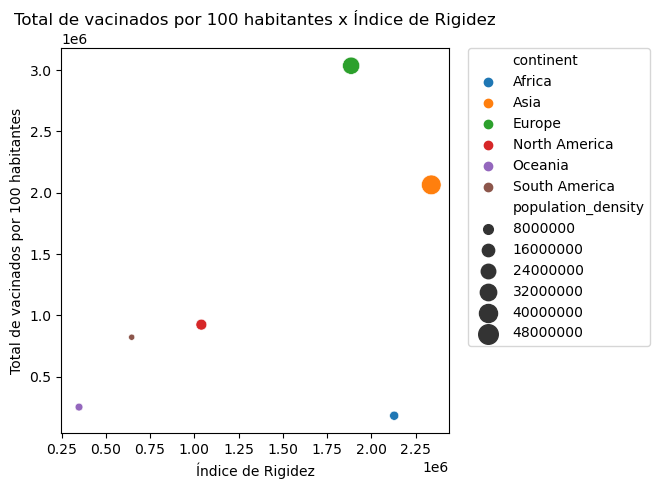

In [ ]:
#Scatterplot de total_vaccinations_per_hundred x stringency_index using matplotlib
import seaborn as sns
plt.figure(figsize=(5,5))
sns.scatterplot(data=country_vaccinated, x="stringency_index", y="total_vaccinations_per_hundred", hue="continent", size="population_density", sizes=(20, 200), legend="brief")
plt.title("Total de vacinados por 100 habitantes x Índice de Rigidez")
plt.xlabel("Índice de Rigidez")
plt.ylabel("Total de vacinados por 100 habitantes")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### Conclusões

Observando o scatterplot dos continentes, nota-se que no geral o índice de rigidez das medidas restritivas levaram a um maior número total de vacinados. No caso do continente africano, apesar de um índice de rigidez relativamente alto, notou-se um baixo número de vacinados, isso pode ser devido a outros fatores socioeconômicos associados. 

## Análise 4

